<a href="https://colab.research.google.com/github/SachinScaler/IntroToML-NN_Dec23/blob/main/Logistic_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 80.6MB/s]


In [11]:
import pandas as pd
df_churn = pd.read_csv("churn_logistic.csv")
df_churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


### EDA to filter relevant columns

In [13]:
df_churn.corr()

<ipython-input-13-21e837b7d6d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_churn.corr()


,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code,Churn
Account Length,1.000000,0.011789,0.004564,-0.002186,-0.044533,0.011056,0.008875,0.036037,0.018248,0.032344,0.004566,0.043553,-0.002178,-0.009046,-0.044525,0.022312,0.011036,-0.053540,0.015886
VMail Message,0.011789,1.000000,-0.104007,-0.033322,-0.030805,0.019169,0.012681,0.045794,0.961267,-0.004139,-0.104004,0.003754,-0.033291,0.008852,-0.030863,0.043756,0.019177,0.013022,-0.135798
Day Mins,0.004564,-0.104007,1.000000,0.139616,0.068947,0.006526,-0.189754,0.003526,-0.107875,0.033672,1.000000,0.015095,0.139588,0.051255,0.068926,0.037390,0.006770,-0.027064,0.252872
Eve Mins,-0.002186,-0.033322,0.139616,1.000000,-0.002052,0.003427,-0.091823,0.029898,-0.027109,0.017075,0.139618,0.011644,1.000000,0.043977,-0.002114,-0.015453,0.003376,0.005082,0.124518
Night Mins,-0.044533,-0.030805,0.068947,-0.002052,1.000000,-0.029546,-0.046834,-0.077787,-0.034514,0.016829,0.068944,-0.011866,-0.002053,0.003351,0.999999,-0.004103,-0.029493,-0.001191,0.055394
Intl Mins,0.011056,0.019169,0.006526,0.003427,-0.029546,1.000000,-0.036683,0.158024,0.020768,0.011332,0.006524,-0.007976,0.003414,0.033223,-0.029574,0.037316,0.999993,-0.015421,0.088293
CustServ Calls,0.008875,0.012681,-0.189754,-0.091823,-0.046834,-0.036683,1.000000,-0.065908,0.008368,-0.006075,-0.189754,0.003466,-0.091831,-0.023973,-0.046838,-0.034975,-0.036798,0.012072,0.251015
Intl Plan,0.036037,0.045794,0.003526,0.029898,-0.077787,0.158024,-0.065908,1.000000,0.054449,-0.047392,0.003527,-0.016155,0.029915,0.017933,-0.077805,-0.044742,0.157794,0.050064,0.291062
VMail Plan,0.018248,0.961267,-0.107875,-0.027109,-0.034514,0.020768,0.008368,0.054449,1.000000,-0.004035,-0.107872,0.005710,-0.027085,0.021642,-0.034566,0.043064,0.020793,0.004742,-0.152296
Day Calls,0.032344,-0.004139,0.033672,0.017075,0.016829,0.011332,-0.006075,-0.047392,-0.004035,1.000000,0.033667,0.011825,0.017072,-0.020394,0.016806,0.023909,0.011476,-0.000091,0.014876


<Axes: xlabel='Day Mins', ylabel='Day Charge'>

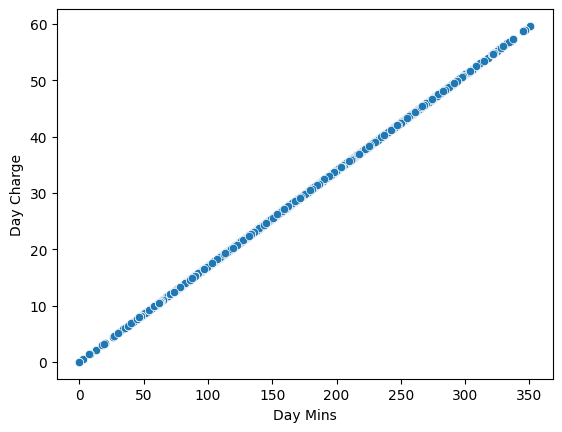

In [17]:
import seaborn as sns

sns.scatterplot(x=df_churn["Day Mins"],y=df_churn["Day Charge"])

### Let's build Model

In [19]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']

y = df_churn["Churn"]
X = df_churn[cols]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((4560, 5), (1140, 5))

In [23]:
X_train, X_val,y_train, y_val= train_test_split(X_train,y_train, test_size=0.25,random_state=42)
X_train.shape,X_val.shape

((2565, 5), (855, 5))

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val =scaler.transform(X_val)
X_test =scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(random_state=42,penalty=None)
lgr.fit(X_train,y_train )

LogisticRegression(penalty=None, random_state=42)

In [45]:
y_test[:5]

561     0
5348    1
1525    0
4170    1
1779    0
Name: Churn, dtype: int64

In [46]:
y_pred=lgr.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 0])

In [47]:
y_pred_prob = lgr.predict_proba(X_test)
y_pred_prob[:5]

array([[0.71703488, 0.28296512],
       [0.36389902, 0.63610098],
       [0.83783789, 0.16216211],
       [0.57917169, 0.42082831],
       [0.57657521, 0.42342479]])

In [48]:
lgr.score(X_test, y_test) # accuracy

0.7131578947368421

In [49]:
lgr.score(X_train,y_train) # accuracy

0.7076023391812866

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7131578947368421

In [41]:
import numpy as np
def acc(y_true, y_pred):
    return np.sum(y_true==y_pred)/len(y_true)

# test acuuracy
acc(y_test, y_pred)

0.7131578947368421

Add Regularization

In [ ]:
### find the best possible value of c in range of [0.01, 500,100]

In [50]:
np.arange(0.01, 500,100)

array([1.0000e-02, 1.0001e+02, 2.0001e+02, 3.0001e+02, 4.0001e+02])

In [51]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.inspection import DecisionBoundaryDisplay


In [53]:
# dataset creation with 3 classes
from sklearn.datasets import make_classification


# create artificial Dataset
X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

In [54]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(298, 2)

In [59]:
model = LogisticRegression(multi_class= "ovr")

In [60]:
model.fit(X_tr_cv,y_tr_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='ovr')

In [62]:
"TrainScore", model.score(X_tr_cv,y_tr_cv)

('TrainScore', 0.9195979899497487)

In [63]:
"TestScore", model.score(X_test,y_test)

('TestScore', 0.92)

In [65]:
"TestScore", model.score(X_val,y_val)

('TestScore', 0.91)

<ipython-input-66-aa3a84c38b50>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


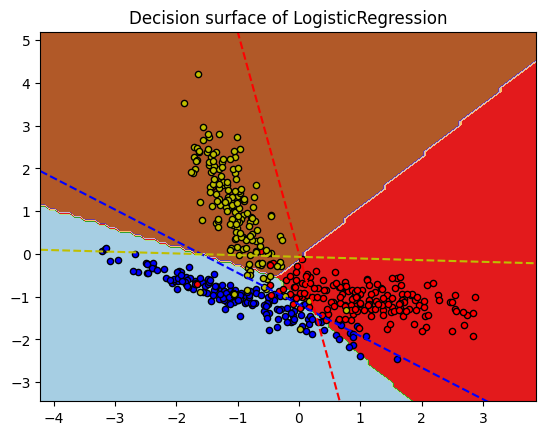

In [66]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()


In [67]:
# create artificial Dataset
X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)

In [70]:
X[y==2] # logistic Regression

array([[-1.07328735,  1.12579697],
       [-1.30251507,  1.27609317],
       [-0.98202469, -0.01419437],
       [-0.72487789,  0.77456833],
       [-1.42880776,  2.27597716],
       [-0.52445204, -0.5905891 ],
       [-1.07565483,  1.19021951],
       [-1.2454917 ,  1.62332518],
       [-1.00278261,  1.35164489],
       [-1.45662277,  1.5749969 ],
       [-0.91091868,  0.91573969],
       [-1.72110174,  2.27648989],
       [-1.64014913,  4.19768881],
       [-0.91832973,  0.1038145 ],
       [-0.6185807 , -0.24931192],
       [-1.30528069,  1.53942628],
       [-0.95676131,  1.42107955],
       [-0.80444906, -0.0149823 ],
       [-1.71224832,  2.49893046],
       [-0.28958931, -0.28542241],
       [-0.70374059,  0.07608018],
       [-1.04581563,  0.35081082],
       [-1.01927411,  2.74190792],
       [-1.69481013,  1.99564978],
       [-0.46486669,  0.91014543],
       [-1.15757476,  1.05603588],
       [-1.35110264,  0.72437867],
       [-0.70042398,  0.2997031 ],
       [-1.65815977,

In [ ]:
X[y==2] = True   # logistic Regression

In [71]:
X[y!=2] = False

array([[-1.06046348e+00, -9.46151693e-01],
       [ 1.10608927e+00, -5.78336994e-01],
       [ 1.68740640e-01, -1.23179638e+00],
       [-1.10643431e+00, -9.73680424e-01],
       [ 4.23058277e-02, -1.01173227e+00],
       [-1.27793724e+00, -8.24138962e-01],
       [-9.65763076e-01, -9.58893538e-01],
       [ 3.94484197e-01, -1.02280544e+00],
       [-1.48473818e+00, -5.97862989e-01],
       [-5.06213921e-01, -1.17932620e+00],
       [ 3.16059359e-01, -8.01995782e-01],
       [ 1.66390609e+00, -7.30037480e-01],
       [ 6.58706788e-01, -1.52760674e+00],
       [ 9.19890507e-01, -1.18593296e+00],
       [ 1.77470056e-01, -5.45381133e-01],
       [-1.67191715e+00, -7.03396575e-01],
       [-9.80164212e-02, -1.46012663e+00],
       [ 1.34536727e+00, -7.99683988e-01],
       [-2.10149060e-01, -6.05858326e-01],
       [-1.96882579e-01, -1.26274773e+00],
       [ 2.06344385e+00, -1.44635397e+00],
       [-8.71517429e-01, -9.75055333e-01],
       [-1.69110751e+00, -6.32113207e-01],
       [-1.